In [1]:
pip install yellowbrick

In [2]:
pip install data-science-utils

In [3]:
pip install numpy==1.21.4

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv("lab_courses.csv", sep=';')
data.head()

,component,action,target,contextid,contextlevel,contextinstanceid,userid,courseid,timecreated
0,5,10,5,105728,50,1089,14744,1089,1420079021
1,17,10,6,105844,70,67635,14744,1089,1420079038
2,5,10,5,105728,50,1089,14744,1089,1420079049
3,9,10,12,105734,70,67525,14744,1089,1420079066
4,5,10,5,106176,50,1094,10752,1094,1420100418


In [6]:
X = data[['component','action','target','contextid','contextlevel','contextinstanceid','timecreated']]

In [7]:
y = data[['component','action','target','contextid','contextlevel','contextinstanceid','timecreated']]

In [8]:
# Scaling is important when working with distance based 
# (e.g., euklidian) cluster algorithms
from sklearn import preprocessing

X_std = X.copy()

# Since the fit_transform() strips the column headers
# we add them after the transformation

In [9]:
# Let's define max. 6 different cluster colors - if you like you can add here more.
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

In [10]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


# Plot for multiple ks
k_max = 7
ncols = 3
# calculate number of rows
nrows = k_max // ncols + (k_max % ncols > 0)
# set figure size
fig = plt.figure(figsize=(15,15))

for k in range(3,k_max+1):
    
    # Apply clustering for k clusters
    # Final decision
   # Final decision
    km = KMeans(n_clusters=4, 
            max_iter=300, 
            tol=1e-04, 
            init='k-means++', 
            n_init=10, 
            random_state=42, 
            algorithm='lloyd')

    km_fit = km.fit(X_std)
    


<Figure size 1080x1080 with 0 Axes>

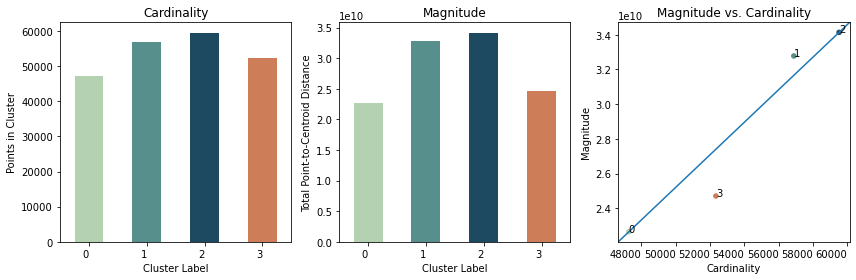

In [11]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(km_fit.labels_,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(X_std,
                       km_fit.labels_,
                       km_fit.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(X_std,
                              km_fit.labels_,
                              km_fit.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:km_fit.n_clusters],
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

In [12]:
X['cluster'] = km.labels_
X_std['cluster'] = km.labels_

<ipython-input-12-ab0c3e56b071>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = km.labels_


In [13]:
X_std['cluster'].value_counts()

2    59515
1    56879
3    52340
0    47272
Name: cluster, dtype: int64